In [113]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup
# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from pathlib import Path
import glob
from math import floor


In [98]:
# get the staging list
path_stage = Path('/home/b1044271/EEGsleep/SleepStaging/mat/mne2/')
stage_files = os.listdir(path_stage)
stage_files = [file for file in stage_files]
stage_files = sorted(stage_files)

# get the subjects list
Data_path = '/home/b1044271/Columbia/Preprocessed/Better_ica/'
subj_files = os.listdir(Data_path)
subj_files = [file for file in subj_files]
subj_files = sorted(subj_files)

# Create path for results
path_results = Path('/home/b1044271/Columbia/Results/Time-resolved')

In [136]:
subj_files

['VP01_notch2_ica_done.set',
 'VP03_notch2_ica_done.set',
 'VP04_notch2_ica_done.set',
 'VP05_notch2_ica_done.set',
 'VP06_notch2_ica_done.set',
 'VP07_notch2_ica_done.set',
 'VP08_notch2_ica_done.set',
 'VP10_notch2_ica_done.set',
 'VP11_notch2_ica_done.set',
 'VP12_notch2_ica_done.set',
 'VP13_notch2_ica_done.set',
 'VP14_notch2_ica_done.set',
 'VP15_notch2_ica_done.set',
 'VP16_notch2_ica_done.set',
 'VP17_notch2_ica_done.set',
 'VP18_notch2_ica_done.set',
 'VP19_notch2_ica_done.set']

In [99]:
t = 5 #in seconds
t2 = 10
f_max =  45
electrode = 'E257'
fs = 250 
# Settings for the analyses
SETTINGS_B  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :1 , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}


In [212]:
# START
EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, subj_files[1])) # read raw .set file
EEG1 = EEG.pick(electrode, exclude=[]) # select Cz for further analysis

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
/tmp/ipykernel_3864477/116643734.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, subj_files[1])) # read raw .set file
/tmp/ipykernel_3864477/116643734.py:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  EEG = mne.io.read_raw_eeglab(os.path.join(Data_path, subj_files[1])) # read raw .set file


In [236]:
X = EEG._data
np.shape(X)
7323310/250
29293/60

488.21666666666664

In [242]:
Y = X[14000:20000]
np.save('data_snippet.npy',Y)

In [241]:
cd 'Columbia/Aperiodic_sleep/Scripts/'

/home/b1044271/Columbia/Aperiodic_sleep/Scripts


In [213]:
EEG_seg = mne.make_fixed_length_epochs(EEG1, duration = 20, reject_by_annotation = 'True', overlap = 15)

Not setting metadata
5855 matching events found
No baseline correction applied
0 projection items activated


In [214]:
EEG_psd = EEG_seg.compute_psd(**SETTINGS_B)

Using data from preloaded Raw for 5855 events and 5000 original time points ...
0 bad epochs dropped
Effective window size : 5.000 (s)


In [215]:
#FOOOF settings
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'fixed'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'knee'}

fm1 = FOOOFGroup(**SETTINGS_F1)
fm2 = FOOOFGroup(**SETTINGS_F2)

In [216]:
fm1.fit(EEG_psd._freqs, np.squeeze(EEG_psd._data), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])


Running FOOOFGroup across 5855 power spectra.


In [217]:
fm2.fit(EEG_psd._freqs, np.squeeze(EEG_psd._data), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])


Running FOOOFGroup across 5855 power spectra.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Model fitting was unsuccessful.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)
/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.

In [218]:
path_stage = '/home/b1044271/EEGsleep/SleepStaging/*.txt'
stage_files = glob.glob(path_stage)

#set required time resolution
#stages are in 30 seconds so the conversion depends on the time resolution specified
fs_actual = 30
fs_req = 5
fs_eq = fs_actual / fs_req

In [219]:
files  = pd.read_csv(stage_files[1])
stages = list(files.iloc[:,0])

Stages_new = np.array([])
Stages_new= [val for val in stages for _ in range(0, floor(fs_eq))]    


In [221]:
expo = fm2.get_params('aperiodic_params','exponent')
knee = fm2.get_params('aperiodic_params','knee')

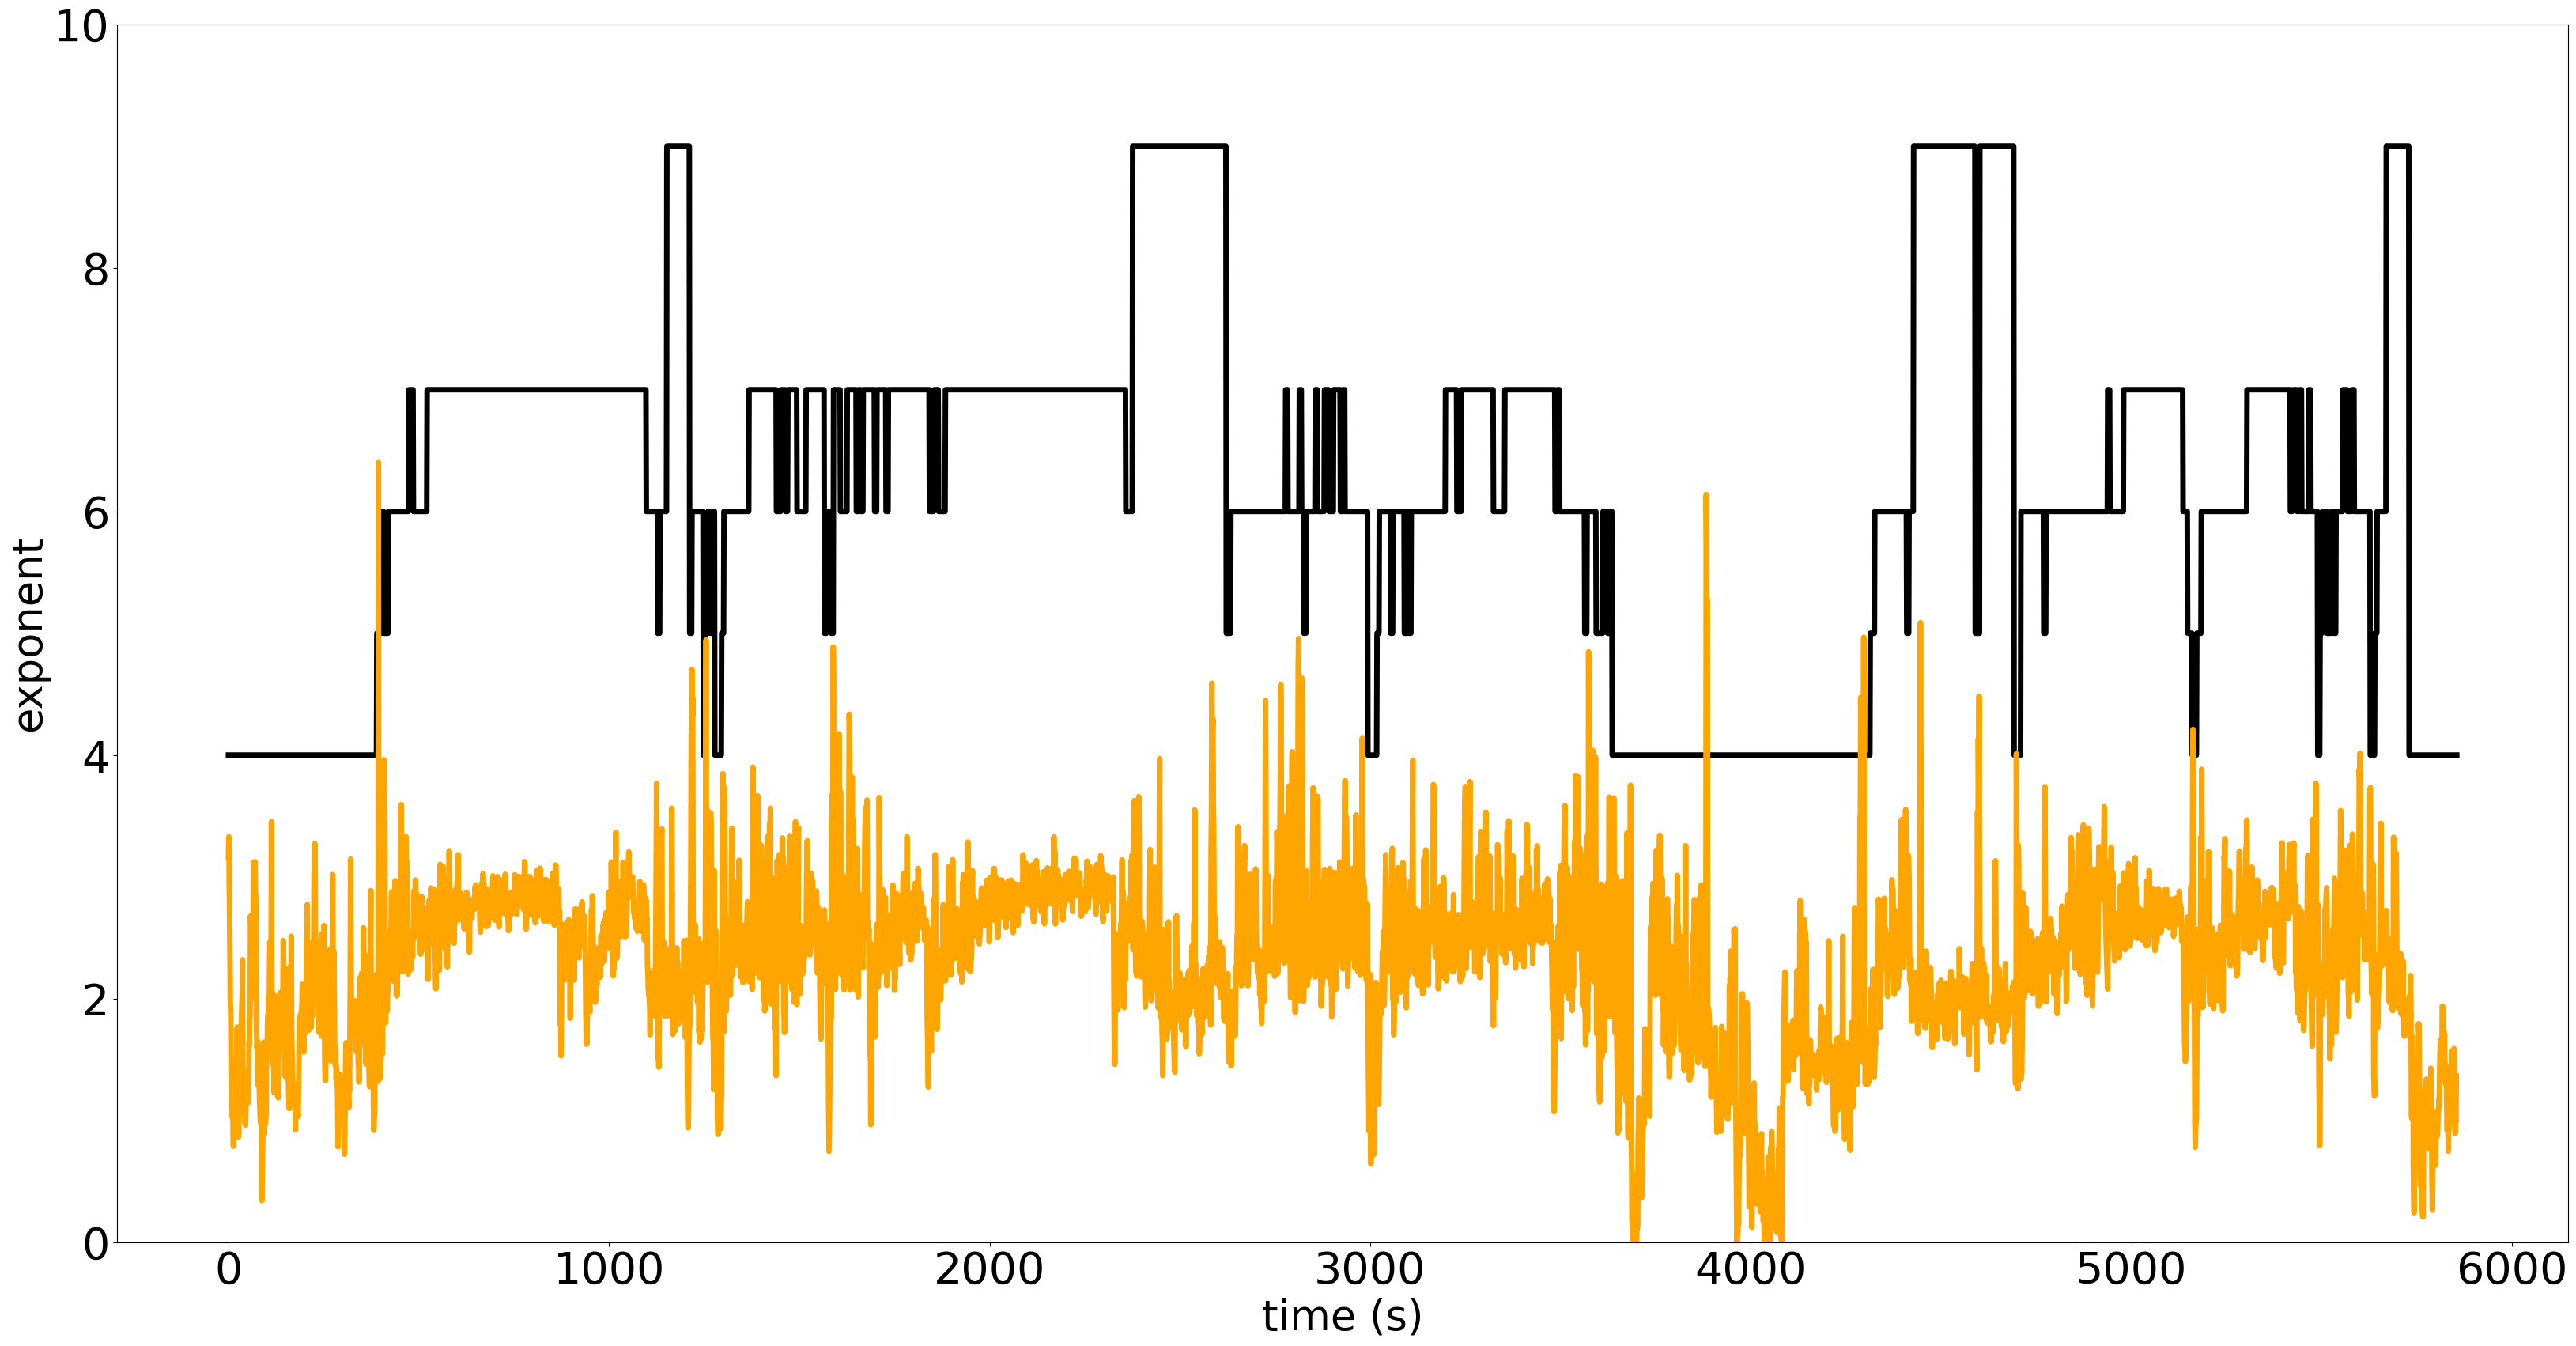

In [229]:
STg_p = new_list = [x+4 for x in Stages_new]
plt.figure(figsize=(40, 20))

plt.plot(STg_p,'black', label='Stages',linewidth=5)
plt.plot(expo,'orange', label='exponent',linewidth=5)
plt.ylim(0,10)

plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('exponent', fontsize=38)
plt.xlabel('time (s)', fontsize=38)

plt.savefig("SingleSubj_full_night2.svg", dpi = 600 )


In [226]:
len(STg_p)

5856

In [138]:
np.save(Path(path_results /electrode /  'Slope_k'),knee)

In [141]:
len(expo)

3774

In [137]:
knee

array([ 0.54226736, -0.38288564, -0.41147441, ..., -0.81037982,
       -0.91460994, -0.96834386])

In [ ]:
plt.plot(fm1.get_params('aperiodic_params','exponent'))
plt.plot(fm2.get_params('aperiodic_params','exponent'))


(-5.0, 5.0)

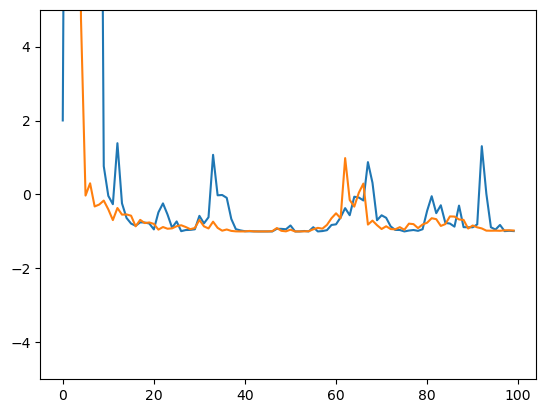

In [96]:
#plt.plot(fm2.get_params('aperiodic_params','knee'))
plt.plot(fm2.get_params('aperiodic_params','knee'))

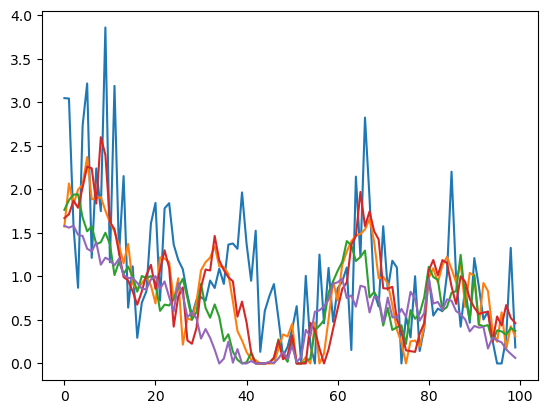

In [89]:
plt.plot(fm1.get_params('r_squared'))
plt.plot(fm2.get_params('r_squared'))

In [86]:
X = [np.mean(fm2.get_params('r_squared')),
np.mean(fm4.get_params('r_squared')),
np.mean(fm6.get_params('r_squared')),
np.mean(fm7.get_params('r_squared')),
np.mean(fm8.get_params('r_squared'))
    ]

X

[0.4472455980277137,
 0.706392892242217,
 0.7828355087199842,
 0.6966759290746383,
 0.8169181119448897]

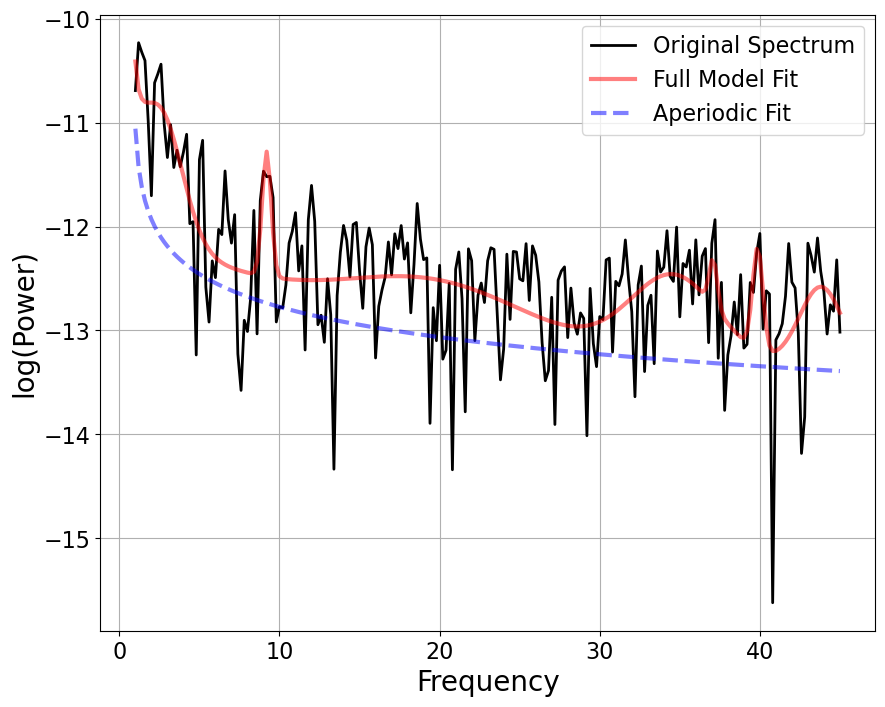

In [87]:
fp = fm2.get_fooof(ind=91, regenerate=True)
fp.plot()

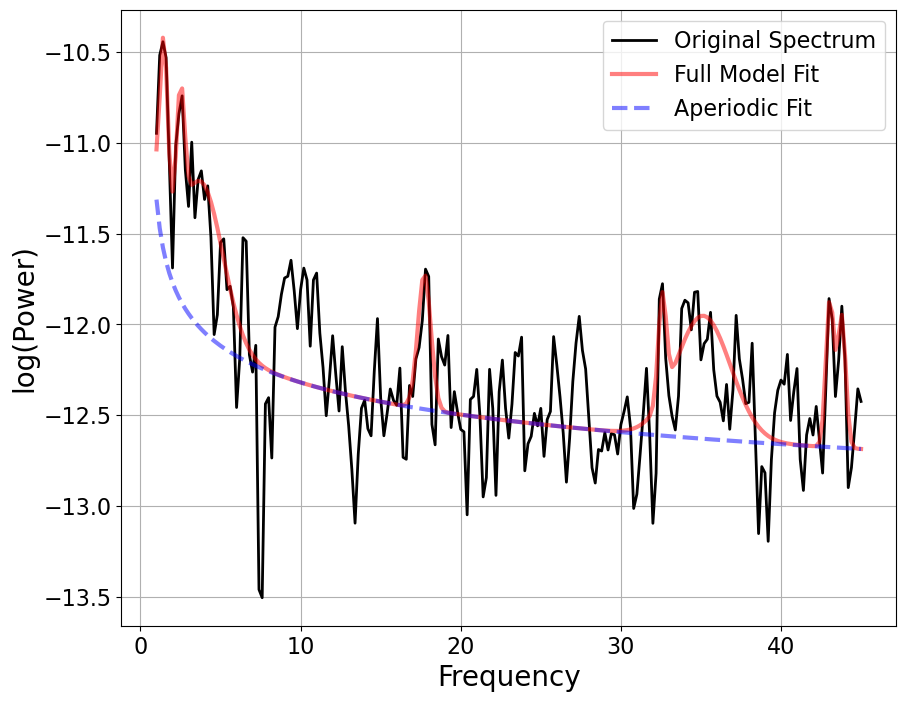

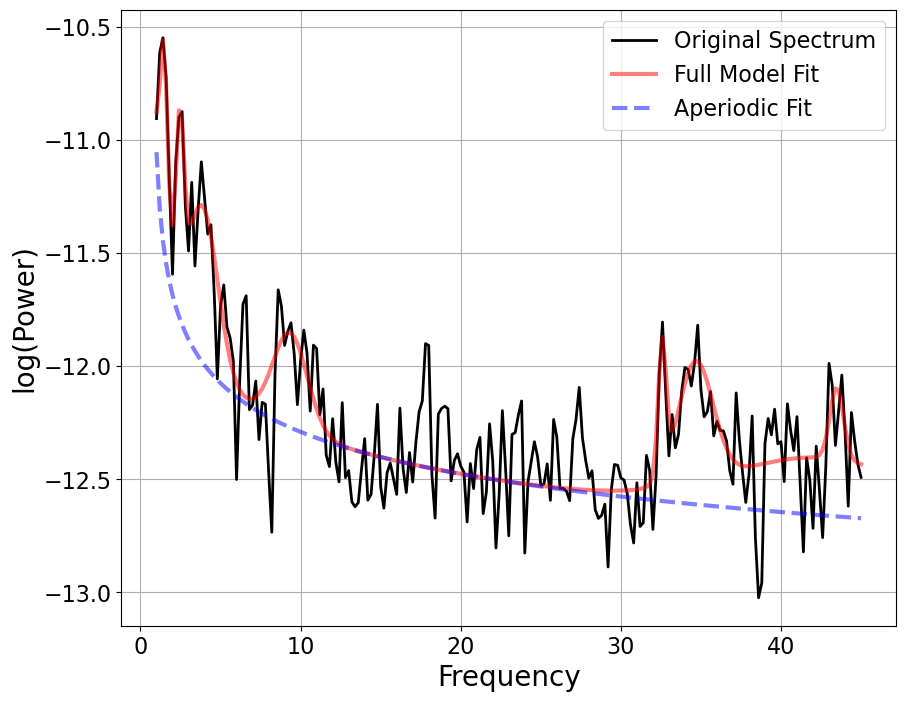

In [56]:
fp = fm4.get_fooof(ind=91, regenerate=True)
fp.plot()
fp = fm6.get_fooof(ind=91, regenerate=True)
fp.plot()

fp = fm8.get_fooof(ind=91, regenerate=True)
fp.plot()

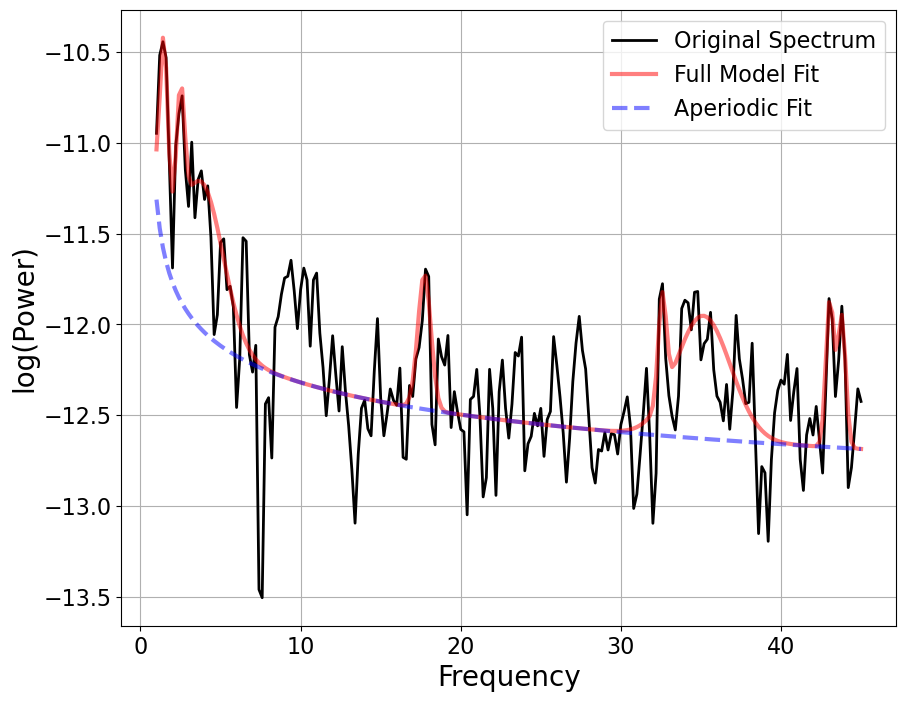

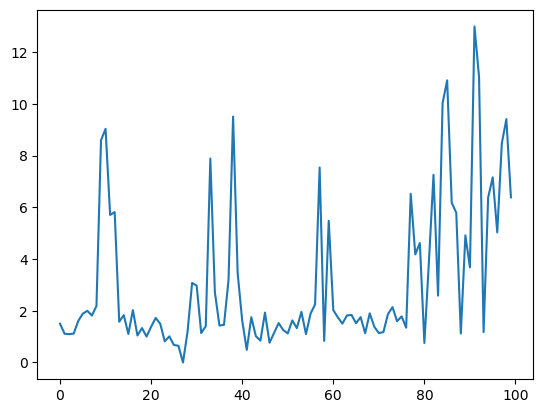

In [9]:
plt.plot(fm2.get_params('aperiodic_params','exponent'))

In [148]:
path_files = '/home/b1044271/Columbia/Results/Time-resolved/E257/*.npy'
fooof_files = glob.glob(path_files)

path_stage = '/home/b1044271/EEGsleep/SleepStaging/*.txt'
stage_files = glob.glob(path_stage)

In [149]:
fooof_files

['/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_k.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Slope_nk.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_k.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/r2_nk.npy',
 '/home/b1044271/Columbia/Results/Time-resolved/E257/Knee_k.npy']

In [156]:
X = np.load(fooof_files[0])
Y = np.load(fooof_files[2])
Z = np.load(fooof_files[4])

In [167]:
slp = X[0][~np.isnan(X[0])]
r2  = Y[0][~np.isnan(Y[0])]
kn  = Z[0][~np.isnan(Z[0])]

In [170]:
slp2 = slp[0:len(Stages_new)]
r22  = r2[0:len(Stages_new)]
kn2  = kn[0:len(Stages_new)]

In [209]:
len(Stages_new)

5550

In [205]:
STg_p = new_list = [x+4 for x in Stages_new]

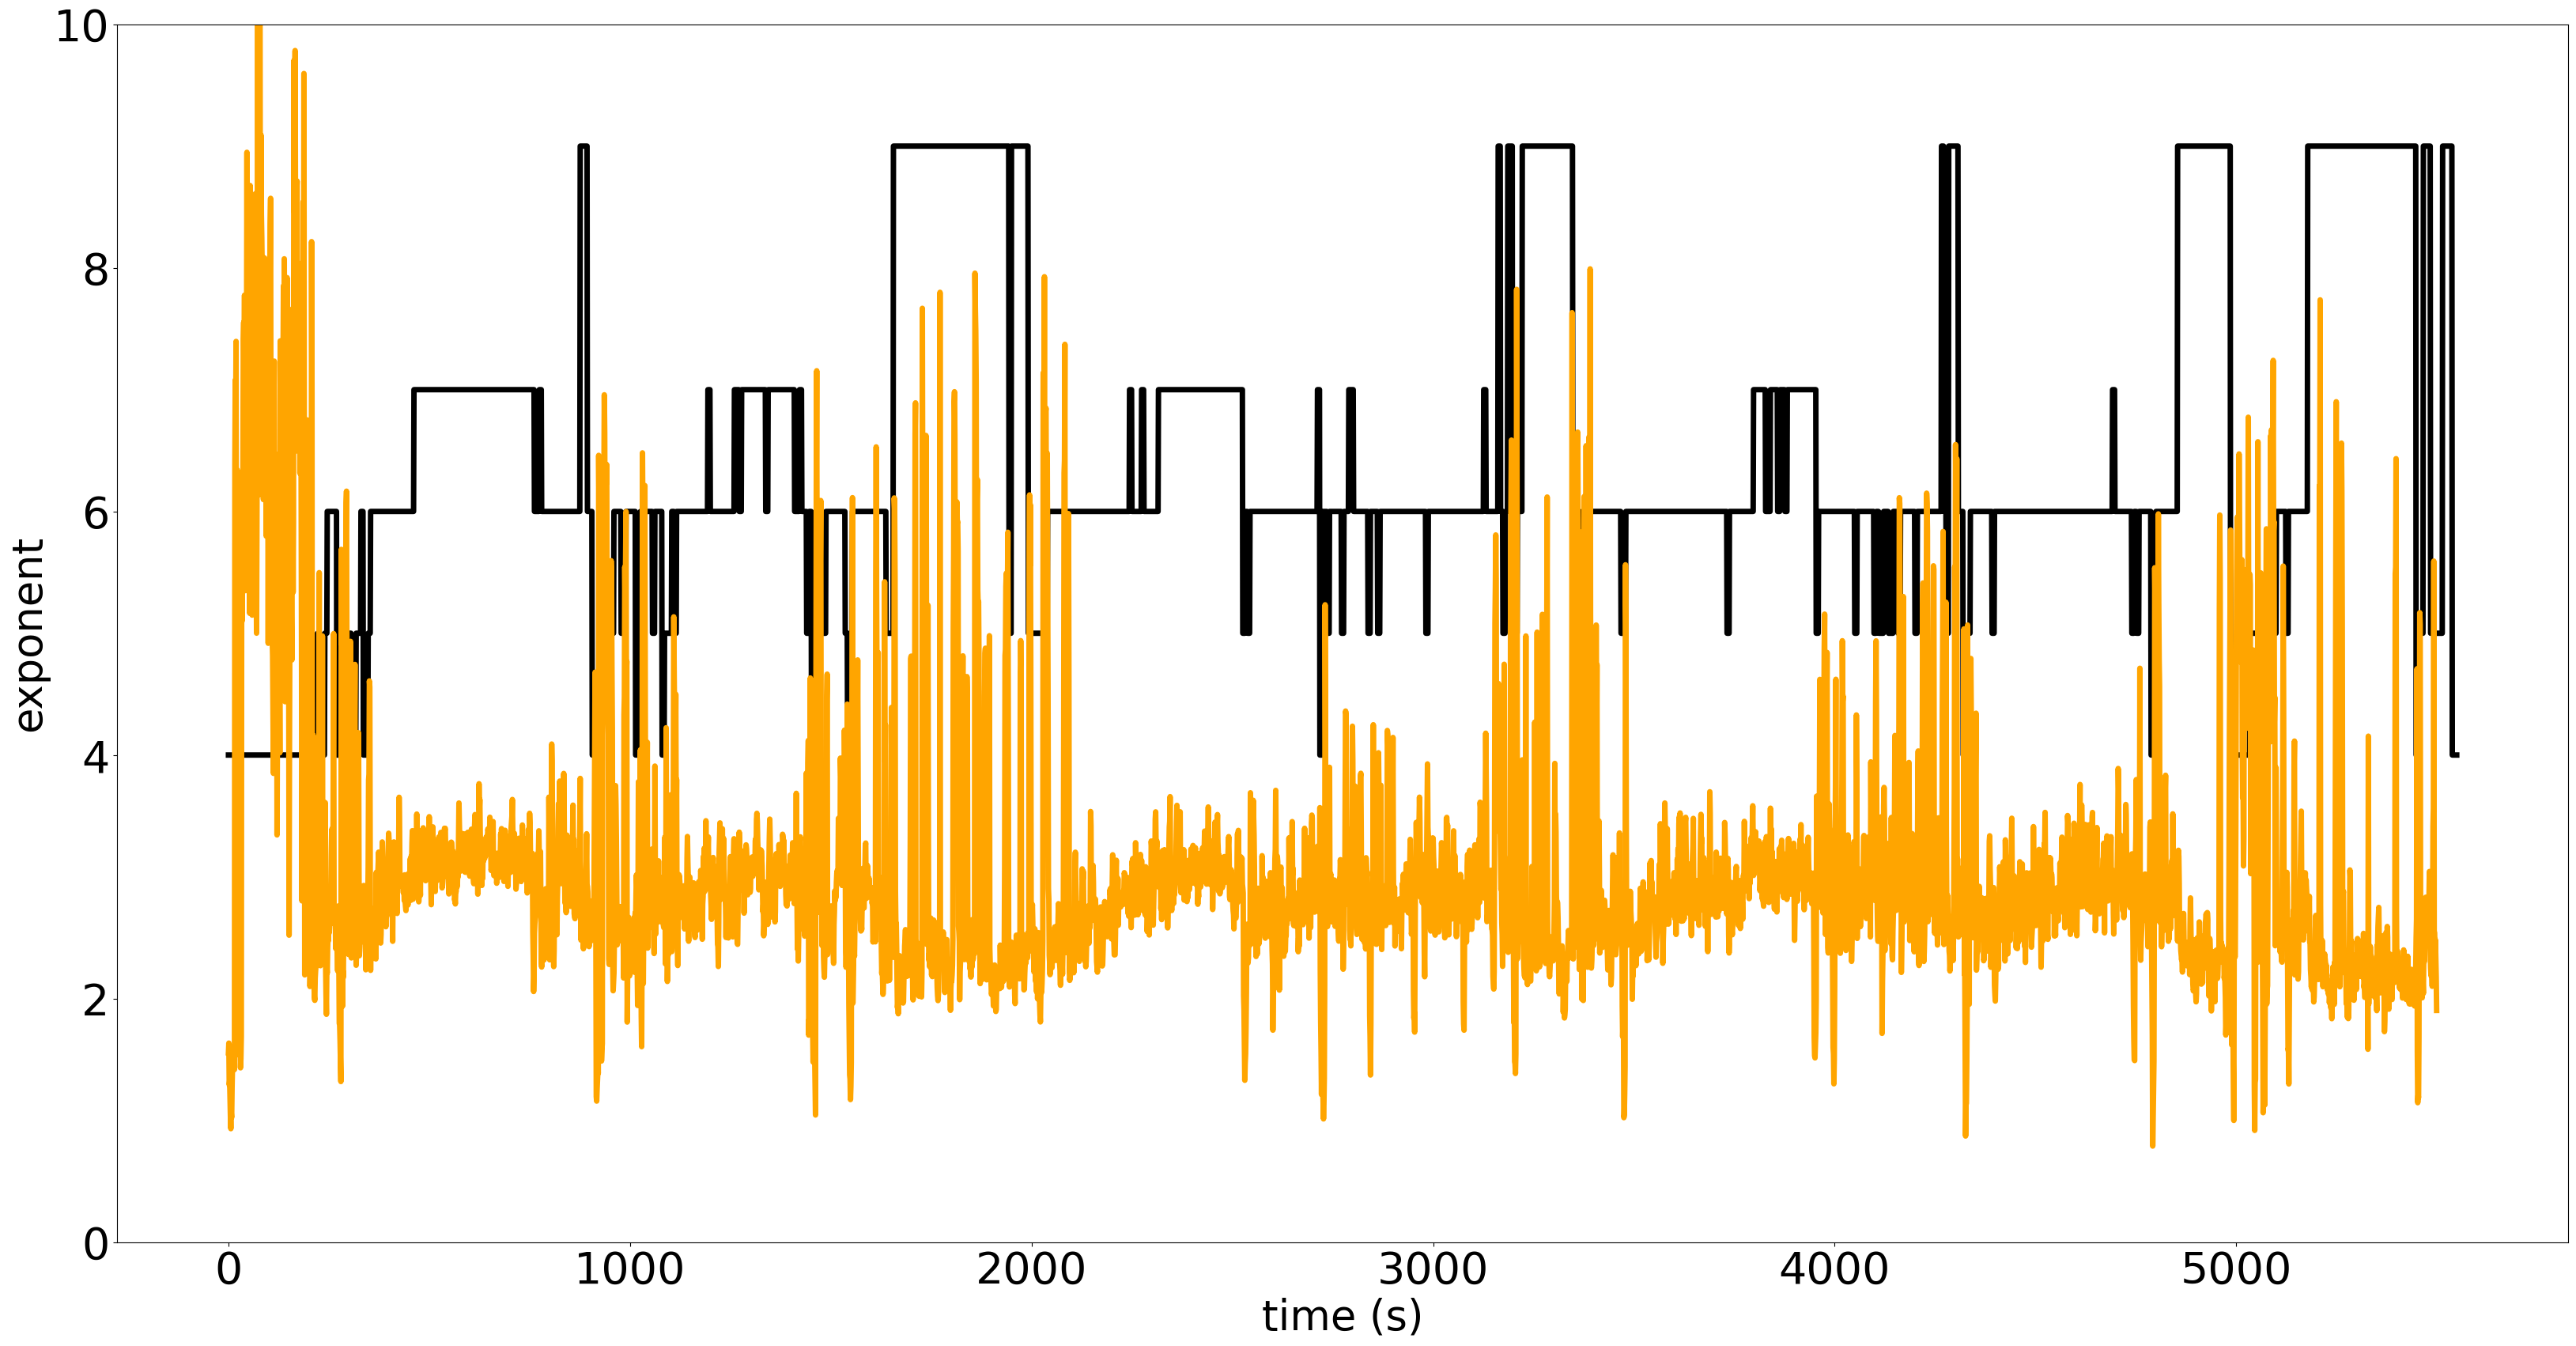

In [211]:
plt.figure(figsize=(40, 20))

plt.plot((STg_p[0:5550]),'black', label='Stages',linewidth=5)
plt.plot(slp2[0:5500],'orange', label='exponent',linewidth=5)
plt.ylim(0,10)

plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('exponent', fontsize=38)
plt.xlabel('time (s)', fontsize=38)

plt.savefig("SingleSubj_full_night.svg", dpi = 600 )

In [172]:
Stages_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
